## Тестовое задание на позицию "Аналитик (Junior)" компании Mailfit

### Задание

- [x] Динамика open rate
- [x] Динамика click to open rate
- [x] Динамика conversion rate
- [x] Динамика AOV
- [x] Топ лучших тем по open rate
- [x] Лучший день недели для оптравки писем
- [x] Динамика оттока базы

## Импорт библиотек и ознакомление с данными

In [755]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [756]:
df1 = pd.read_csv(r'C:\Users\EGO\Downloads\Mailfit — Тестовое задание на позицию аналитика - data 1_1.csv')

In [757]:
df2 = pd.read_csv(r'C:\Users\EGO\Downloads\Mailfit — Тестовое задание на позицию аналитика - data 1_2.csv')

In [758]:
df = df1.merge(df2, how = 'left', left_on = 'Тема письма', right_on = 'Тема письма')

In [759]:
display(df.head(10))

,Тема письма,Сегмент,Дата рассылки,Время отправки,Отправлено писем,Отписки,Доставлено,Открытий,Заказы,Доход,Кликов
0,Тема1,Сегмент1,04.06.2021,15:00:00,561114,440,560873,70321,75,7613776,2274
1,Тема2,Сегмент1,07.06.2021,17:22:00,557128,476,556910,88384,209,6907996,4549
2,Тема3,Сегмент1,11.06.2021,16:00:00,555455,504,555214,70835,70,3558583,1709
3,Тема4,Сегмент2,14.06.2021,15:00:00,554383,509,554144,74813,75,6207904,2136
4,Тема5,Сегмент1,18.06.2021,16:00:00,552486,435,552281,71378,52,6905844,1635
5,Тема6,Сегмент1,21.06.2021,15:00:00,551496,507,551292,71855,117,5699744,2541
6,Тема7,Сегмент1,25.06.2021,16:00:00,549503,435,549293,73590,106,7715260,2300
7,Тема8,Сегмент1,28.06.2021,18:26:00,548189,512,548337,71527,113,6907996,1913
8,Тема9,Сегмент1,02.07.2021,16:00:00,469817,420,469504,73489,103,5255639,2338
9,Тема10,Сегмент1,05.07.2021,17:28:00,544211,490,544018,74668,127,5588178,2225


In [760]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 41
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Тема письма       42 non-null     object
 1   Сегмент           42 non-null     object
 2   Дата рассылки     42 non-null     object
 3   Время отправки    42 non-null     object
 4   Отправлено писем  42 non-null     int64 
 5   Отписки           42 non-null     int64 
 6   Доставлено        42 non-null     int64 
 7   Открытий          42 non-null     int64 
 8   Заказы            42 non-null     int64 
 9   Доход             42 non-null     int64 
 10  Кликов            42 non-null     int64 
dtypes: int64(7), object(4)
memory usage: 3.9+ KB


### Преобразоваение в форомат даты

In [761]:
df['Дата рассылки'] = pd.to_datetime(df['Дата рассылки'], format = "%d.%m.%Y")

## Динамика open rate

### Расчет

In [762]:
df['open_rate'] = round(df['Открытий'] / df['Доставлено'] * 100,2)

### Добавим отдельно столбец с номером месяца

In [763]:
df['month'] = df['Дата рассылки'].dt.month

### Добавим отдельный столбец с днём недели

In [764]:
df['day_of_week'] = df['Дата рассылки'].dt.day_name()

In [765]:
df.head()

,Тема письма,Сегмент,Дата рассылки,Время отправки,Отправлено писем,Отписки,Доставлено,Открытий,Заказы,Доход,Кликов,open_rate,month,day_of_week
0,Тема1,Сегмент1,2021-06-04,15:00:00,561114,440,560873,70321,75,7613776,2274,12.54,6,Friday
1,Тема2,Сегмент1,2021-06-07,17:22:00,557128,476,556910,88384,209,6907996,4549,15.87,6,Monday
2,Тема3,Сегмент1,2021-06-11,16:00:00,555455,504,555214,70835,70,3558583,1709,12.76,6,Friday
3,Тема4,Сегмент2,2021-06-14,15:00:00,554383,509,554144,74813,75,6207904,2136,13.50,6,Monday
4,Тема5,Сегмент1,2021-06-18,16:00:00,552486,435,552281,71378,52,6905844,1635,12.92,6,Friday


### Среднее значение и количество отправлений в месяц

In [766]:
_ = pd.pivot_table(df,
               index='month',
               values='open_rate',
                aggfunc ={'mean', 'count', 'std'})

In [767]:
_

,count,mean,std
month,,,
6,8,13.3825,1.052517
7,9,13.5500,1.026475
8,9,13.7400,0.479375
9,8,15.3825,0.757057
10,8,16.9575,0.501960


In [768]:
round(_.head(3).mean(),2)

count     8.67
mean     13.56
std       0.85
dtype: float64

### График open_rate

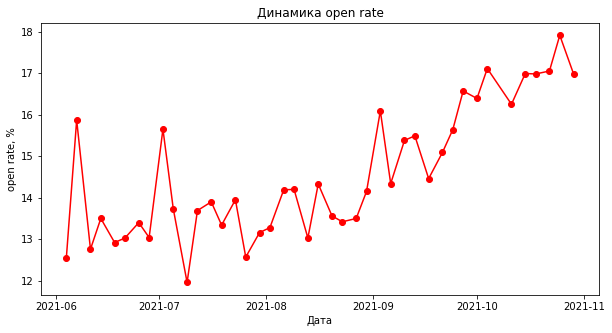

In [769]:
plt.subplots(figsize=(10, 5))
plt.plot (df['Дата рассылки'], df['open_rate'], '-ro')
plt.title("Динамика open rate")
plt.xlabel("Дата")
plt.ylabel("open rate, %")
plt.show()

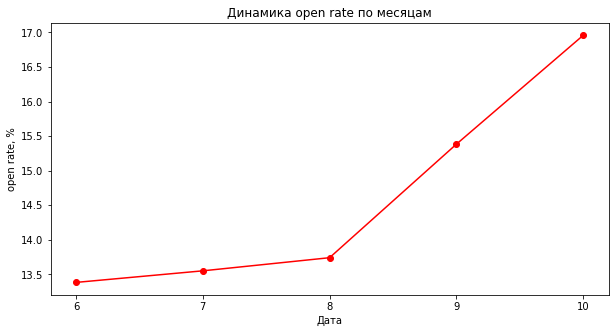

In [770]:
plt.subplots(figsize=(10, 5))
plt.plot (['6','7','8','9','10'], list(_['mean']), '-ro')
plt.title("Динамика open rate по месяцам")
plt.xlabel("Дата")
plt.ylabel("open rate, %")
plt.show()

### Время рассылки

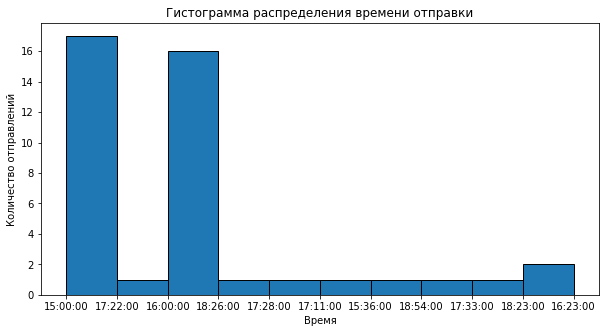

In [771]:
plt.subplots(figsize=(10, 5))
plt.hist(df['Время отправки'], edgecolor = 'black')
plt.title("Гистограмма распределения времени отправки")
plt.xlabel("Время")
plt.ylabel("Количество отправлений")
plt.show()

### Вывод 

Количество рассылок является почти одинаковым. Отправления происходят почти в одно и тоже время.

Начиная с **09.2021** наблюдается существенное улучшение показателя (open rate), хотя значение все равно остается существенно меньше, чем в среднем по отраслям ($\approx$ 24 %).

- **13.56 %** (среднее значение 06.2021 - 08.2021) до **15.38 %** в сентябре. **Увеличение** показателя составило **1.82 %**.
- **15.38 %** до **16.96 %** в октябре. **Увеличение** показателя составило **1.58 %** по сравнению с сентябрем и 3.4 % по сравнению с летними месяцами.

По предложенным данным сказать причину не представляется возможным.

## Динамика click to open rate

### Расчет

In [772]:
df['CTOR'] = round(df['Кликов'] / df['Открытий'] * 100,2)

In [773]:
df.head()

,Тема письма,Сегмент,Дата рассылки,Время отправки,Отправлено писем,Отписки,Доставлено,Открытий,Заказы,Доход,Кликов,open_rate,month,day_of_week,CTOR
0,Тема1,Сегмент1,2021-06-04,15:00:00,561114,440,560873,70321,75,7613776,2274,12.54,6,Friday,3.23
1,Тема2,Сегмент1,2021-06-07,17:22:00,557128,476,556910,88384,209,6907996,4549,15.87,6,Monday,5.15
2,Тема3,Сегмент1,2021-06-11,16:00:00,555455,504,555214,70835,70,3558583,1709,12.76,6,Friday,2.41
3,Тема4,Сегмент2,2021-06-14,15:00:00,554383,509,554144,74813,75,6207904,2136,13.50,6,Monday,2.86
4,Тема5,Сегмент1,2021-06-18,16:00:00,552486,435,552281,71378,52,6905844,1635,12.92,6,Friday,2.29


### Среднее значение CTOR в месяц

In [774]:
_ = pd.pivot_table(df,
               index='month',
               values='CTOR',
                aggfunc ={'mean', 'std'})

In [775]:
_

,mean,std
month,,
6,3.160000,0.907099
7,3.844444,1.305451
8,3.056667,0.549136
9,2.767500,0.399240
10,3.038750,1.372427


### График click to open rate

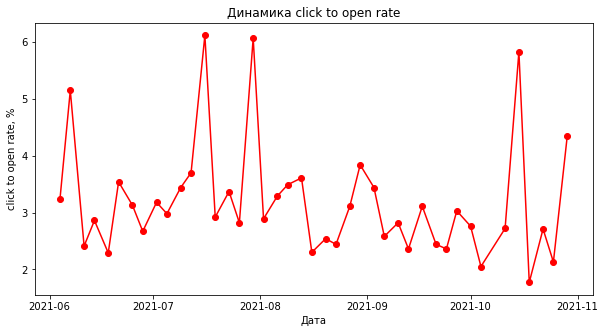

In [776]:
plt.subplots(figsize=(10, 5))
plt.plot (df['Дата рассылки'], df['CTOR'], '-ro')
plt.title("Динамика click to open rate")
plt.xlabel("Дата")
plt.ylabel("click to open rate, %")
plt.show()

### Значения без выбросов

In [777]:
df_ = df[df['CTOR'] < 5]

In [778]:
_ = pd.pivot_table(df_,
               index='month',
               values='CTOR',
                aggfunc ={'mean', 'std'})

In [779]:
_

,mean,std
month,,
6,2.875714,0.453500
7,3.201429,0.318351
8,3.056667,0.549136
9,2.767500,0.399240
10,2.640000,0.844670


In [780]:
round(_.head(3).mean(),2)

mean    3.04
std     0.44
dtype: float64

### График click to open rate без выбросов

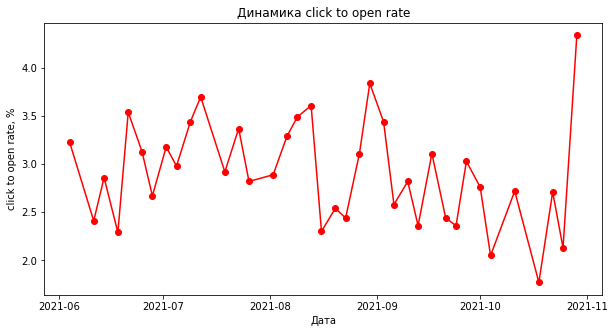

In [781]:
plt.subplots(figsize=(10, 5))
plt.plot (df_['Дата рассылки'], df_['CTOR'], '-ro')
plt.title("Динамика click to open rate")
plt.xlabel("Дата")
plt.ylabel("click to open rate, %")
plt.show()

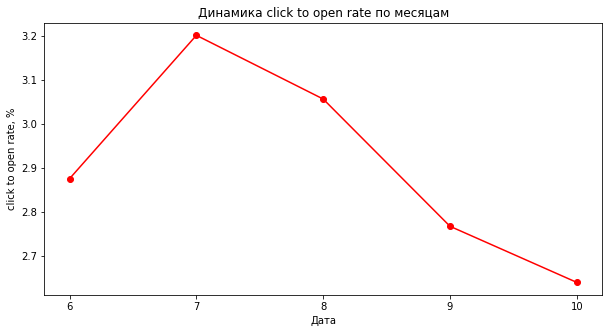

In [782]:
plt.subplots(figsize=(10, 5))
plt.plot (['6','7','8','9','10'], list(_['mean']), '-ro')
plt.title("Динамика click to open rate по месяцам")
plt.xlabel("Дата")
plt.ylabel("click to open rate, %")
plt.show()

### Вывод 

Цифры показывают, что показатель остается стабильным от месяца к месяцу, но существенно может отличаться стандартное отклонение.

На графике отчетливо видны выбросы. 

После удаления выбросов, расчетов среднего значения и построения графика можно говорить, что данная метрика показывает своё медленное ухудшение от месяца к месяцу, несмотря на увеличение показателя open rate.

- С **3.04 %** (среднее значение 06.2021 - 08.2021) до **2.77 %** в сентябре. **Уменьшение** показателя составило **0.27 %**.
- С **2.77 %** до **2.64 %** в октябре. **Уменьшение** показателя составило **0.13 %** по сравнению с сентябрем и 0.4 % по сравнению с летними месяцами.

Клиенты стали чаще открывать письма, но данное действие не конвертируется в переход по ссылке или иному целевому действии.

## Динамика conversion rate

### Расчет

In [783]:
df['CR'] = round(df['Заказы'] / df['Кликов'] * 100,2)

In [784]:
df.head()

,Тема письма,Сегмент,Дата рассылки,Время отправки,Отправлено писем,Отписки,Доставлено,Открытий,Заказы,Доход,Кликов,open_rate,month,day_of_week,CTOR,CR
0,Тема1,Сегмент1,2021-06-04,15:00:00,561114,440,560873,70321,75,7613776,2274,12.54,6,Friday,3.23,3.30
1,Тема2,Сегмент1,2021-06-07,17:22:00,557128,476,556910,88384,209,6907996,4549,15.87,6,Monday,5.15,4.59
2,Тема3,Сегмент1,2021-06-11,16:00:00,555455,504,555214,70835,70,3558583,1709,12.76,6,Friday,2.41,4.10
3,Тема4,Сегмент2,2021-06-14,15:00:00,554383,509,554144,74813,75,6207904,2136,13.50,6,Monday,2.86,3.51
4,Тема5,Сегмент1,2021-06-18,16:00:00,552486,435,552281,71378,52,6905844,1635,12.92,6,Friday,2.29,3.18


### Среднее значение conversion rate в месяц

In [785]:
_ = pd.pivot_table(df, 
               index='month',
               values='CR',
                aggfunc ={'mean', 'std'})

In [786]:
_

,mean,std
month,,
6,4.225000,0.905207
7,4.560000,0.888679
8,4.791111,0.664425
9,4.516250,0.764833
10,3.826250,0.818010


In [787]:
_.mean()

mean    4.383722
std     0.808231
dtype: float64

### График conversion rate

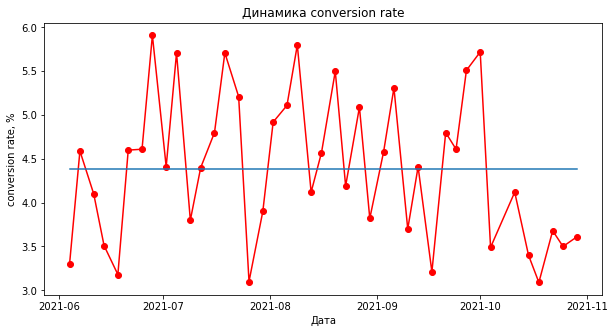

In [788]:
x = [_['mean'].mean()]
plt.subplots(figsize=(10, 5))
plt.plot (df['Дата рассылки'], df['CR'], '-ro')
plt.plot(df['Дата рассылки'],x * 42, linestyle='-')
plt.title("Динамика conversion rate")
plt.xlabel("Дата")
plt.ylabel("conversion rate, %")
plt.show()

### Вывод 

Conversion rate является устойчивым. **Стандартное отклонение** и **значение** в среднем **не меняются** от месяца к месяцу. Показатель колеблется вокруг среднего значения, которое равняется 4.4.

## Динамика AOV

### Расчет

In [789]:
df['AOV'] = df['Доход '] / df['Заказы']

In [790]:
df.head()

,Тема письма,Сегмент,Дата рассылки,Время отправки,Отправлено писем,Отписки,Доставлено,Открытий,Заказы,Доход,Кликов,open_rate,month,day_of_week,CTOR,CR,AOV
0,Тема1,Сегмент1,2021-06-04,15:00:00,561114,440,560873,70321,75,7613776,2274,12.54,6,Friday,3.23,3.30,101517.013333
1,Тема2,Сегмент1,2021-06-07,17:22:00,557128,476,556910,88384,209,6907996,4549,15.87,6,Monday,5.15,4.59,33052.612440
2,Тема3,Сегмент1,2021-06-11,16:00:00,555455,504,555214,70835,70,3558583,1709,12.76,6,Friday,2.41,4.10,50836.900000
3,Тема4,Сегмент2,2021-06-14,15:00:00,554383,509,554144,74813,75,6207904,2136,13.50,6,Monday,2.86,3.51,82772.053333
4,Тема5,Сегмент1,2021-06-18,16:00:00,552486,435,552281,71378,52,6905844,1635,12.92,6,Friday,2.29,3.18,132804.692308


### Среднее значение average order value в месяц

In [791]:
_ = pd.pivot_table(df, 
               index='month',
               values='AOV',
                aggfunc ={'mean', 'std'})

In [792]:
_

,mean,std
month,,
6,72952.151470,32299.702958
7,51375.206982,19991.389056
8,62142.536483,14155.306630
9,58635.447398,21026.694040
10,81461.205347,22533.141448


### График average order value

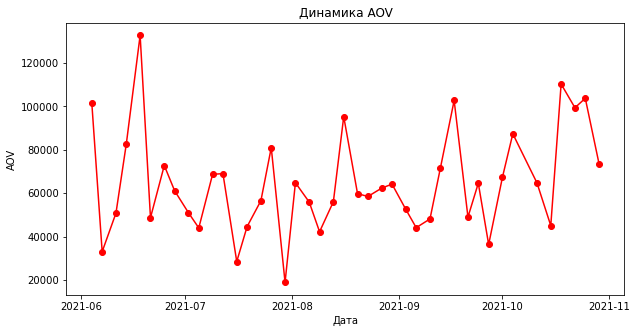

In [793]:
plt.subplots(figsize=(10, 5))
plt.plot (df['Дата рассылки'], df['AOV'], '-ro')
plt.title("Динамика AOV")
plt.xlabel("Дата")
plt.ylabel("AOV")
plt.show()

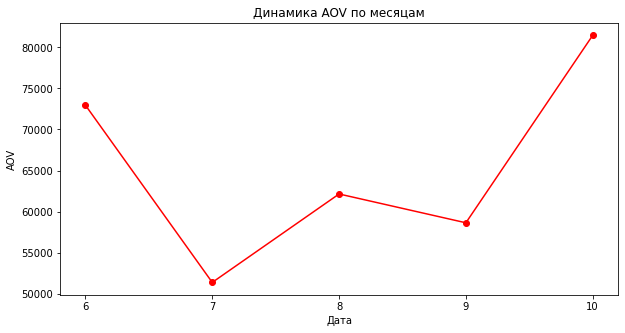

In [794]:
plt.subplots(figsize=(10, 5))
plt.plot (['6','7','8','9','10'], list(_['mean']), '-ro')
plt.title("Динамика AOV по месяцам")
plt.xlabel("Дата")
plt.ylabel("AOV")
plt.show()

На дневной динамике видно, что в июне наблюдается отрицательная тенденция и доход более 120000 выглядит выбросом. Будем делать выводы без данного дня.

In [795]:
df_ = df[df['AOV'] < 120000]

In [796]:
_ = pd.pivot_table(df_,
               index='month',
               values='AOV',
                aggfunc ={'mean', 'std'})

In [797]:
_

,mean,std
month,,
6,64401.788493,23125.772363
7,51375.206982,19991.389056
8,62142.536483,14155.306630
9,58635.447398,21026.694040
10,81461.205347,22533.141448


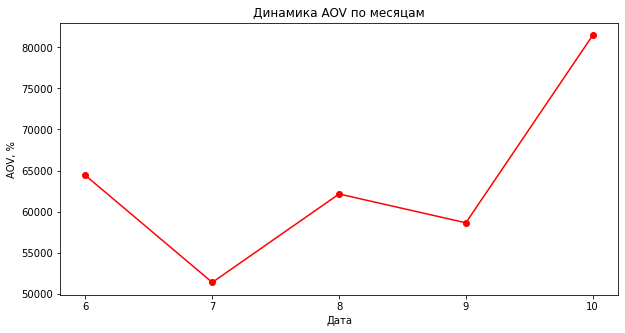

In [798]:
plt.subplots(figsize=(10, 5))
plt.plot (['6','7','8','9','10'], list(_['mean']), '-ro')
plt.title("Динамика AOV по месяцам")
plt.xlabel("Дата")
plt.ylabel("AOV, %")
plt.show()

### Вывод

Средний чек показывает положительную динамику на данный момент. 

- С **09.2021** по **10.2021** **прирост** составил **38.93 %**

- С минимума (**07.2021**) по **10.2021** **прирост** составил **58.56 %**

## Топ лучших тем по open rate

In [799]:
df.sort_values(by=['open_rate'], ascending=False).head()

,Тема письма,Сегмент,Дата рассылки,Время отправки,Отправлено писем,Отписки,Доставлено,Открытий,Заказы,Доход,Кликов,open_rate,month,day_of_week,CTOR,CR,AOV
40,Тема41,Сегмент1,2021-10-25,16:23:00,501074,370,501000,89735,67,6952547,1914,17.91,10,Monday,2.13,3.50,103769.358209
35,Тема36,Сегмент1,2021-10-04,15:00:00,515005,485,514905,88089,63,5506008,1804,17.11,10,Monday,2.05,3.49,87396.952381
39,Тема40,Сегмент1,2021-10-22,16:00:00,500265,319,500178,85299,85,8451115,2308,17.05,10,Friday,2.71,3.68,99424.882353
37,Тема38,Сегмент1,2021-10-15,16:00:00,504701,430,504594,85727,170,7660856,4996,16.99,10,Friday,5.83,3.40,45063.858824
41,Тема42,Сегмент1,2021-10-29,15:00:00,496873,336,496796,84335,132,9701772,3660,16.98,10,Friday,4.34,3.61,73498.272727


### Вывод

Самые лучшие темы по open rate - это темы последние. Динамика по увеличению open rate была видна с 08.2021. Нельзя говорить с полной уверенностью, что увеличение open rate произошло за счет тем.

## Динамика оттока базы

In [800]:
_ = pd.pivot_table(df, 
               index='month',
               values='Отписки',
                aggfunc ={'mean', 'std'})

In [801]:
_

,mean,std
month,,
6,477.250000,35.406819
7,429.111111,37.001501
8,406.333333,76.324963
9,507.875000,108.822841
10,416.000000,74.052105


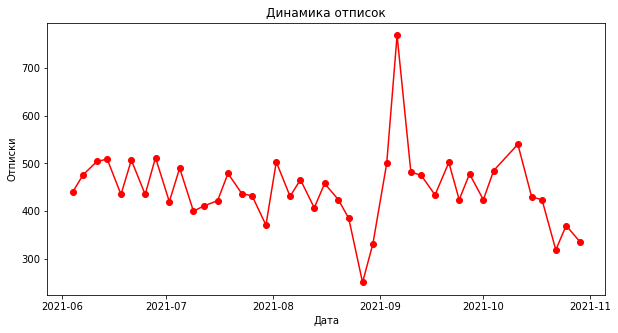

In [802]:
plt.subplots(figsize=(10, 5))
plt.plot (df['Дата рассылки'], df['Отписки'], '-ro')
plt.title("Динамика отписок")
plt.xlabel("Дата")
plt.ylabel("Отписки")
plt.show()

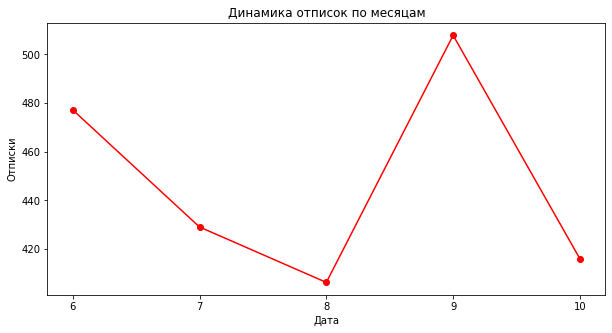

In [803]:
plt.subplots(figsize=(10, 5))
plt.plot (['6','7','8','9','10'], list(_['mean']), '-ro')
plt.title("Динамика отписок по месяцам")
plt.xlabel("Дата")
plt.ylabel("Отписки")
plt.show()

### Вывод 

**06.2021** по **08.2021** отток клиентов в среднем **падал с 477 до 406** клиентов за рассылку. 

**09.2021** произошел резкий **рост отписок**. 

**10.2021** значение отписок **вернулось** к значению до **09.2021**. 

С чем был связан данный всплеск нельзя сказать по одним лишь представленным данным.

## Лучший день недели для оптравки писем 

Не вполне понятно, что имеет ввиду заказчик под словами "лучший день". Уточнить нет возможности, поэтому дам информацию по всем позициям.

In [804]:
df['day_of_week'].value_counts()

Friday     21
Monday     20
Tuesday     1
Name: day_of_week, dtype: int64

In [805]:
columns = ['Отписки', 'Открытий', 'Заказы', 'Доход ', 'Кликов']

In [806]:
for i in columns:
    _ = pd.pivot_table(df,
               index='day_of_week',
               values=i,
                aggfunc ={'mean', 'std'})
    print('')
    print('')
    print(i)
    display(_)
    print(str(round(abs(_['mean'][0] - _['mean'][1])*100/_['mean'].max(),2)) + ' '+'%')
    print('___________________________________________')



Отписки


,mean,std
day_of_week,,
Friday,415.52381,57.997947
Monday,475.00000,86.829537
Tuesday,502.00000,NaN


11.85 %
___________________________________________


Открытий


,mean,std
day_of_week,,
Friday,74213.952381,7715.968471
Monday,76564.500000,8013.422132
Tuesday,78377.000000,NaN


3.0 %
___________________________________________


Заказы


,mean,std
day_of_week,,
Friday,109.428571,39.782624
Monday,101.400000,38.134664
Tuesday,92.000000,NaN


7.34 %
___________________________________________


Доход 


,mean,std
day_of_week,,
Friday,6.460812e+06,1.711747e+06
Monday,5.967754e+06,1.051583e+06
Tuesday,4.509091e+06,NaN


7.63 %
___________________________________________


Кликов


,mean,std
day_of_week,,
Friday,2594.952381,955.668220
Monday,2219.450000,643.591851
Tuesday,1915.000000,NaN


14.47 %
___________________________________________


### Вывод

Больше всего зависимость от дня недели показывают следующие показатели:

- **Среднее количество отписок**. Разница **11.85 %**. В **пятницу** клиенты отписываются в среднем меньше.
- **Среднее количество кликов**. Разница **14.47 %**. В **пятницу** клиенты чаще совершают клики (интересующее действие)
- **Средний доход**. Разница **7.63 %**. В **пятницу** средняя сумма заказа в среднем больше.
- **Среднее количество заказов**. Разница **7.34 %**. В **пятницу** клиенты заказывают в среднем чаще.

Можно сделать вывод, что стоит сконцентрироваться и делать рассылку в пятницу. 

Более точно можно было бы сказать, если бы была дана информация о деятельности компании. Возможно, клиенты в конце недели пытаются удовлетворить свои потребности, которые появились за неделю. В понедельник, после выходных, потребностей меньше. Необходимо больше информации для проверки гипотез.

## Резюме

- **open rate** показывает хорошую положительную динамику.
- При этом **click to open rate** снижается последние несколько месяцев. 
- **Conversion rate** остается неизменным. 
- **Average order value** показывает положительную динамику, особенно с 09.2021 - 10.2021.
- **Топ лучших тем по open rate** - это темы последние, но надо учитывать, что положительная динамика по open rate началась с 09.2021
- **Динамика оттока базы** показывает снижение количества отписок, но 09.2021 произошел резкий отток, 10.2021 количество отписок вернулось к прежнему уровню. Нельзя говорить о причинах по предоставленным данным. Если исключить сентябрь в качестве выброса, то можно заключить, что количество отписок уменьшалось каждый месяц.
- Пятница является **лучшим днем недели для оптравки писем**.